In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error
from sklearn.datasets import make_regression

In [92]:
df = pd.read_csv('capital_bike_data/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 1. Feature Engineer

In [93]:
def feature_engin(df):
    df['date'] = pd.to_datetime(df['datetime'])
    df.set_index(['date'], inplace=True)
    df['month'] = df.index.month
    df['hour'] = df.index.hour

    df.drop(['datetime', 'humidity', 'windspeed', 'weather', 'holiday', 'workingday', 'temp'], axis=1, inplace=True)
    df.reset_index(inplace=True, drop=True)
    df = pd.get_dummies(df, columns=['season'], drop_first=True)
    return df

In [94]:
df.drop(['registered', 'casual'], axis=1, inplace=True)
df = feature_engin(df)
df.head()

,atemp,count,month,hour,season_2,season_3,season_4
0,14.395,16,1,0,0,0,0
1,13.635,40,1,1,0,0,0
2,13.635,32,1,2,0,0,0
3,14.395,13,1,3,0,0,0
4,14.395,1,1,4,0,0,0


### 2. Scaling w. fitting

In [95]:
mms = MinMaxScaler()
df[['atemp']] = mms.fit_transform(df[['atemp']])

plotting to check if polynomization mackes sence:

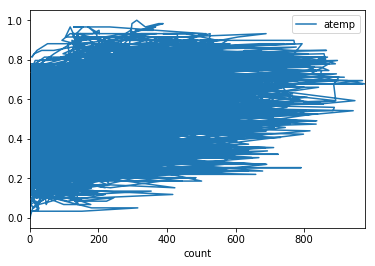

In [96]:
# data = df.sort_values(by='count')
df_plot = df[['count', 'atemp']]
df_plot.set_index('count', inplace=True)
df_plot.plot()

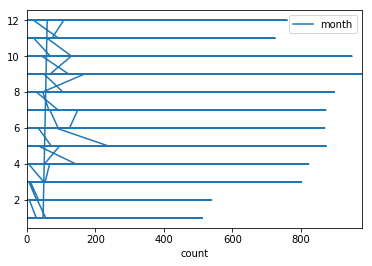

In [97]:
df_plot = df[['count', 'month']]
df_plot.set_index('count', inplace=True)
df_plot.plot()

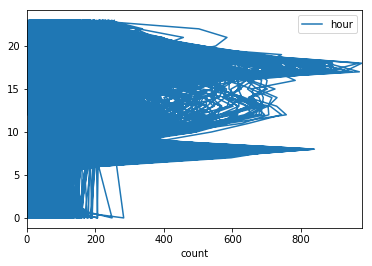

In [98]:
df_plot = df[['count', 'hour']]
df_plot.set_index('count', inplace=True)
df_plot.plot()

### 3. Poly

In [99]:
# initialize polynomiyl function       # for each feature separatly, so they dont corrolate this time
poly_temp = PolynomialFeatures(degree = 4)
poly_hour = PolynomialFeatures(degree = 4)
poly_month = PolynomialFeatures(degree = 4)

In [100]:
# fit polynominal functions
poly_temp_data = pd.DataFrame(index=df.index, data=poly_temp.fit_transform(df[['atemp']]))
poly_hour_data = pd.DataFrame(index=df.index, data=poly_hour.fit_transform(df[['hour']]))
poly_month_data = pd.DataFrame(index=df.index, data=poly_month.fit_transform(df[['month']]))

In [110]:
poly_month_data.head()

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [102]:
y = df['count']
df.drop(['count'], axis=1, inplace=True)

In [107]:
col = pd.concat([df, poly_temp_data, poly_hour_data, poly_month_data], axis=1, join='inner').columns
len(col)
df_concat = pd.concat([df, poly_temp_data, poly_hour_data, poly_month_data], axis=1, join='inner')
df_concat.drop(['atemp', 'month', 'hour'], inplace=True, axis=1)

In [57]:
# regulating polynominal function
from sklearn.linear_model import Lasso

In [111]:
m = Lasso(alpha=5.0)
m.fit(df_concat, y)
ypred = m.predict(df_concat)

/home/pepper/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### 3. Test data & prediction

In [119]:
df = pd.read_csv('capital_bike_data/test.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [120]:
#df.drop(['registered', 'casual'], axis=1, inplace=True)
df = feature_engin(df)

In [121]:
df[['atemp']] = mms.transform(df[['atemp']])

# fit polynominal functions
poly_temp_data = pd.DataFrame(index=df.index, data=poly_temp.transform(df[['atemp']]))
poly_hour_data = pd.DataFrame(index=df.index, data=poly_hour.transform(df[['hour']]))
poly_month_data = pd.DataFrame(index=df.index, data=poly_month.transform(df[['month']]))

In [136]:
df_concat = pd.concat([df, poly_temp_data, poly_hour_data, poly_month_data], axis=1, join='inner')
df_concat.drop(['atemp', 'month', 'hour'], inplace=True, axis=1)

In [155]:
ypred_fin=m.predict(df_concat)
ypred_fin[ypred_fin<=0]=25
ypred_fin = np.round(ypred_fin)

In [156]:
sub_df = pd.read_csv('capital_bike_data/sampleSubmission.csv')
len(sub_df)

6493

In [157]:
len(ypred_fin)

6493

In [158]:
sub_df['count'] = ypred_fin
sub_df['count'] = sub_df['count'].astype(int)

In [159]:
sub_df.head()

,datetime,count
0,2011-01-20 00:00:00,25
1,2011-01-20 01:00:00,25
2,2011-01-20 02:00:00,25
3,2011-01-20 03:00:00,25
4,2011-01-20 04:00:00,25


In [160]:
sub_df.to_csv('kaggel_submission_poly_lasso.csv', index=False)

In [161]:
check = pd.read_csv('kaggel_submission_poly_lasso.csv')
check.head()

,datetime,count
0,2011-01-20 00:00:00,25
1,2011-01-20 01:00:00,25
2,2011-01-20 02:00:00,25
3,2011-01-20 03:00:00,25
4,2011-01-20 04:00:00,25
